In [1]:
import numpy as np
import sys 
import os
import shutil
import matplotlib.pyplot as plt
import scipy.interpolate as sp
import ipyvolume as ipv
sys.path.append('/home/giorgiod/Documents/APDFT/dep')
sys.path.append('/home/giorgiod/Documents/APDFT/src')

In [2]:
from apdft import Calculator

In [3]:
proj_path='/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/'
os.listdir(proj_path)

['def2-QZVPP',
 'cpfl.sh',
 '631G*',
 'def2-TZVP',
 'sto3G',
 'sto6G',
 '321G',
 'cc-pVTZ',
 'aug-cc-pVQZ']

In [4]:
basisSets=[ 'def2-TZVP', 'sto3G', 'sto6G', '321G','631G*','cc-pVTZ']
molecules=['NN','CO','BF','BeNe','LiNa','HeMg','HAl']
alchemy=[-2,-1,0,1,2]
points= np.linspace(1.30,3.20,20)
def dirName(basis_set,molecule,point,alchemy=0):
    return proj_path+basis_set+'/'+molecule+"/A{}_Radius:{}".format(alchemy,str(point)[0:3])+'/'
print (os.path.isdir(dirName(basisSets[3],molecules[2],points[3])))
print (dirName(basisSets[3],molecules[2],points[3]))

True
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/321G/BF/A0_Radius:1.6/


In [5]:
def parse_energy_cc(log_file):
    """Parse the couple cluster energy from an MRCC output file"""
    try:
        with open(log_file,'r') as logf:
            while True:
                line=logf.readline()
                if "Final results:" in line:
                    good_line=logf.readline()
                    if "Total CCSD energy" in good_line:
                        for x in good_line.split(' '):
                            try:
                                float(x)
                                return (float(x))
                            except:
                                pass    
    except:
        print('couldn\'t parse energy return 0 for: '+log_file)
        return 0

In [6]:
def energy(bs,mol,pt,al=0):
    return parse_energy_cc(dirName(bs,mol,pt,al)+'run.log')

In [7]:
energy('sto6G','HAl',2.2)

-241.406435749076

In [8]:
for bs in basisSets:
    for mol in molecules:
        print (energy(bs,mol,2.1))
    #    print (dirName(bs,mol,2.1))

-109.358373284622
-113.141656608565
-124.4608704247
-143.195964470346
-168.993764589247
-202.267264964829
-242.409640465564
-107.655464867585
-111.349401573265
-122.398758036965
-140.863106770202
-166.972702578027
-199.495311472042
-239.404066950961
-108.703286781856
-112.428739043644
-123.570538551095
-142.18107428353
-168.43776349191
-201.193347023238
-241.370362058804
-108.524661097446
-112.295304700088
-123.546020868185
-142.215724873604
-167.970515916722
-201.060259318753
-241.026805847083
-109.25094434072
-113.020627315916
-124.305334564925
-143.000387441951
-168.970240363961
-202.214991146198
-242.361873484174
-109.35479171442
-113.137820599509
-124.456990464884
-143.200383329379
-168.993575473278
-202.28221328434
-242.415609123746


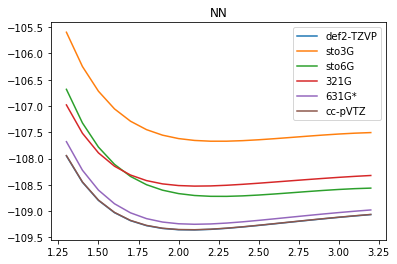

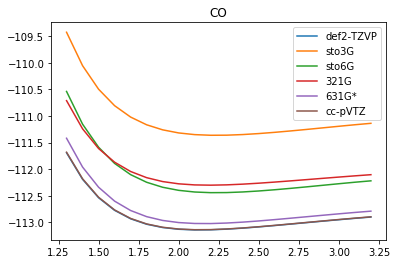

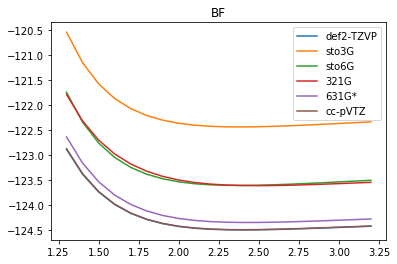

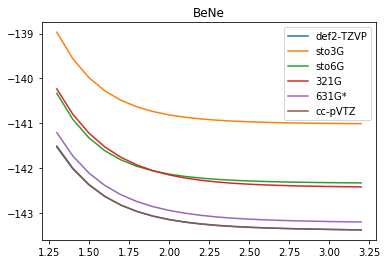

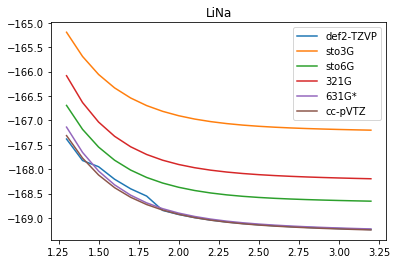

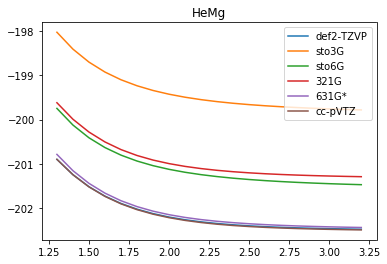

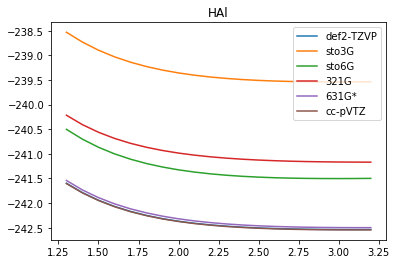

In [9]:
for mol in molecules:
    for bs in basisSets:
        plt.plot(points,[energy(bs,mol,pt) for pt in points],label=bs)
    plt.title(mol)
    plt.legend()
    plt.show()

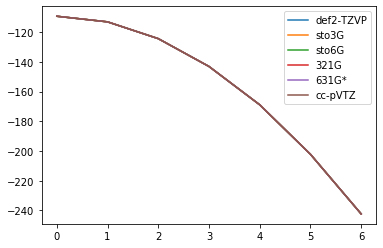

In [10]:
for bs in basisSets:
    apes=[]
    for mol in molecules:
        apes.append(energy('cc-pVTZ',mol,2.))
    plt.plot(apes,label=bs)
plt.legend()

# get minimun and vibrational frequency

In [11]:
nn_scan=np.asarray([energy('def2-TZVP','NN',pt) for pt in points])
NN_spline_pes=np.linspace (1.3,3.2,1000) # points 20 in 1.3-3.2 (1.9bohrs)
NN_spline=sp.spline(points,nn_scan,NN_spline_pes, order=3)
m=NN_spline.argmin()
k=(NN_spline[m+1]+NN_spline[m-1]-2*NN_spline[m])/(1.9e-3)**2
Rmin=1.3+m*1.9e-3

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
mu_nn=12766.4683422
lightspeed=137.035999753
planck=6.28318530718
centimeter=188972613.392
def to_cm(k,Mu):
    return (k/Mu)**0.5*centimeter/planck/lightspeed

In [13]:
to_cm(k,mu_nn),Rmin

(2435.177842315386, 2.0695)

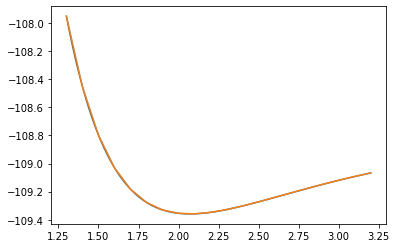

In [14]:
plt.plot(NN_spline_pes,NN_spline)
plt.plot(points,nn_scan)

In [15]:
def sppes(bs,mol,ao=0):
    points=np.linspace(1.3,3.2,20)
    scan=np.asarray([energy(bs,mol,pt) for pt in points])
    target_pts=np.linspace (1.3,3.2,1000) # points 20 in 1.3-3.2 (1.9bohrs)
    return sp.spline(points,nn_scan,target_pts, order=3)

In [16]:
def get_grid(basis_set,molecule,point,alchemy=0):
    return (Calculator.MrccCalculator.get_grid(None, None, dirName(basis_set,molecule,point,alchemy=0)))

In [17]:
def get_ccdensity(basis_set,molecule,point,alchemy=0):
    return Calculator.MrccCalculator.density_on_grid(dirName(basis_set,molecule,point,alchemy=0)+'DENSITY',get_grid(basis_set,molecule,point,alchemy=0)[0])

In [30]:
g,w=get_grid('sto3G','NN',2.3)[0],get_grid('sto3G','NN',2.3)[1]
d=get_ccdensity('sto3G','NN',2.3)
g

array([[-12.33170215,  -4.28288152,  -1.93735506],
       [-12.07967597,  -3.75823928,  -3.75823928],
       [-11.65726394,  -5.41375104,  -2.99446049],
       ...,
       [ 13.95726394,   5.41375104,   2.99446049],
       [ 14.37967597,   3.75823928,   3.75823928],
       [ 14.63170215,   4.28288152,   1.93735506]])

In [89]:
dw=d*w
def Colour(a):
    colour=[]
    mina=min(a)
    maxa=max(a)
    for i in range (len(a)):
        #colour.append(((a[i]-mina)*256/(maxa-mina),0,(maxa-dw[i])*256/(maxa-mina)))
        colour.append((256,0,0))
    return colour

In [ ]:
ipv.quickscatter(g[:,0],g[:,1],g[:,2],size=0.05,color=Colour(d))
#ipv.xyzlim(-40, 40)
ipv.show()

In [95]:
import numpy as np
import scipy.ndimage as snd
import matplotlib.pyplot as plt

In [150]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)
xm,ym=np.meshgrid(x,y,sparse=False)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])